In [2]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# creating a path to load data fames to python 
path = r"C:\Users\pshan\Downloads\InstaCart Basket Analysis"

In [12]:
# loading custs_ords_prods dataset into jupytor
custs_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'custs_ords_prods.pkl'))

In [13]:
# using to load only required columns to save memory
custs_ords_prods = custs_ords_prods[['order_id', 'user_id', 'prices', 'orders_day_of_week', 'order_hour_of_day', 'busiest_day', 'loyalty_flag', 'spender_flag',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependants', 'family_status', 'income']]

In [14]:
custs_ords_prods.columns

Index(['order_id', 'user_id', 'prices', 'orders_day_of_week',
       'order_hour_of_day', 'busiest_day', 'loyalty_flag', 'spender_flag',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependants', 'family_status',
       'income'],
      dtype='object')

In [15]:
custs_ords_prods.shape

(32404859, 18)

In [16]:
custs_ords_prods.head()

,order_id,user_id,prices,orders_day_of_week,order_hour_of_day,busiest_day,loyalty_flag,spender_flag,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,9.0,2,8,Regularly busy,New customer,Low spender,Non-frequent customerr,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,9.0,3,7,Regularly busy,New customer,Low spender,Non-frequent customerr,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,9.0,3,12,Regularly busy,New customer,Low spender,Non-frequent customerr,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,9.0,4,7,Least busy,New customer,Low spender,Non-frequent customerr,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,9.0,4,15,Least busy,New customer,Low spender,Non-frequent customerr,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### bar chart

<Axes: xlabel='orders_day_of_week'>

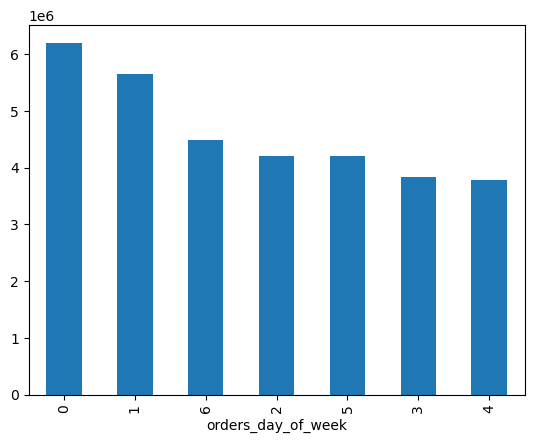

In [17]:
# plotting bar chart on 'orders_day_of_week'
custs_ords_prods['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

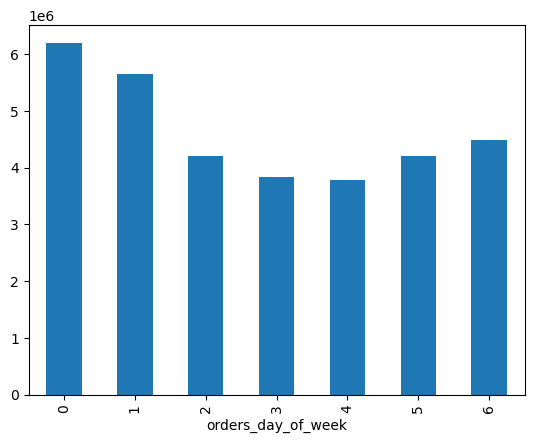

In [19]:
# using sort_index to arrange the plot per days of week
custs_ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar()

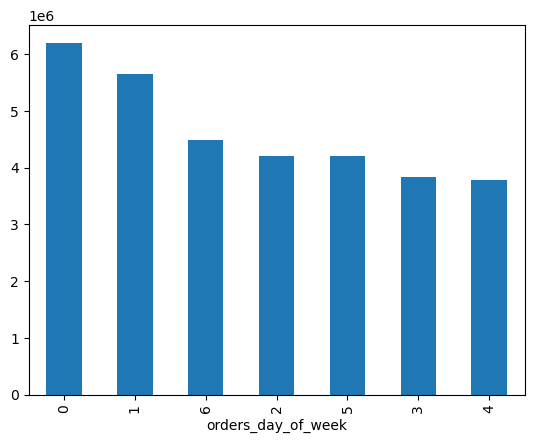

In [20]:
bar = custs_ords_prods['orders_day_of_week'].value_counts().plot.bar()

In [21]:
# exportign the bar chart, so it can be used outside jupytor
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Histogram

<Axes: ylabel='Frequency'>

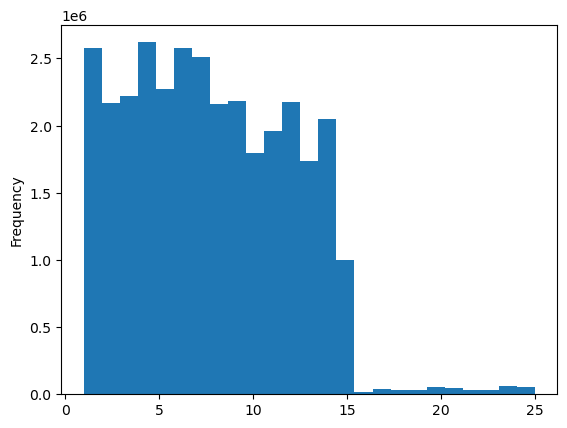

In [22]:
# creating a histogram of the “prices” column.

custs_ords_prods['prices'].plot.hist(bins = 25)

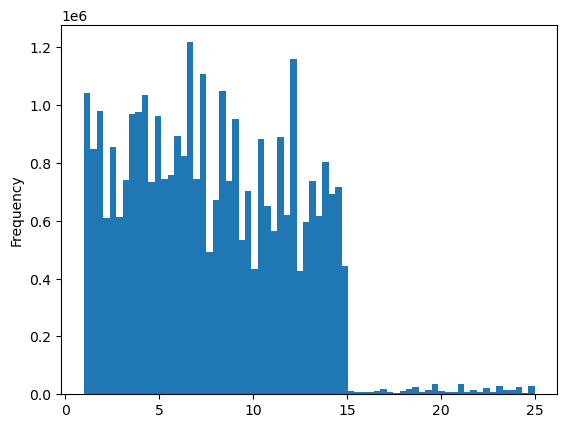

In [37]:
hist = custs_ords_prods['prices'].plot.hist(bins = 70)

In [38]:
# exporting the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

### sampling data

In [26]:
# sampling data, creating a 70/30 split
np.random.seed(4)
dev = np.random.rand(len(custs_ords_prods)) <= 0.7

In [27]:
# big stores 70% of the data frame
big = custs_ords_prods[dev]
# small stores 30% of the data frame
small = custs_ords_prods[~dev]

In [28]:
len(custs_ords_prods)

32404859

In [29]:
# addign the lengths of both dfs to verify
len(big) + len(small)

32404859

In [30]:
# creating a new df to include only the required columns 
df_2 = small[['orders_day_of_week','prices']]

### Line Chart

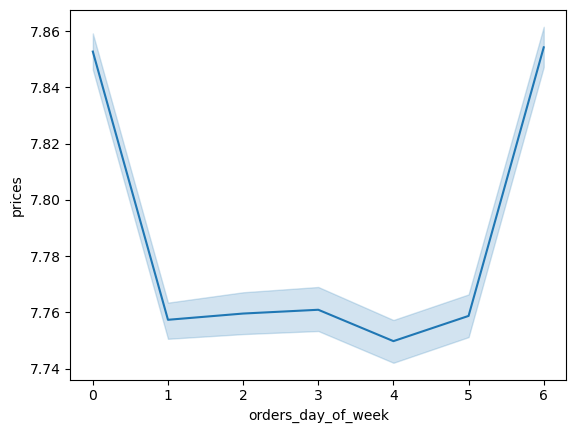

In [31]:
# creating a line chart 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [32]:
# exporting the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))

### histogram

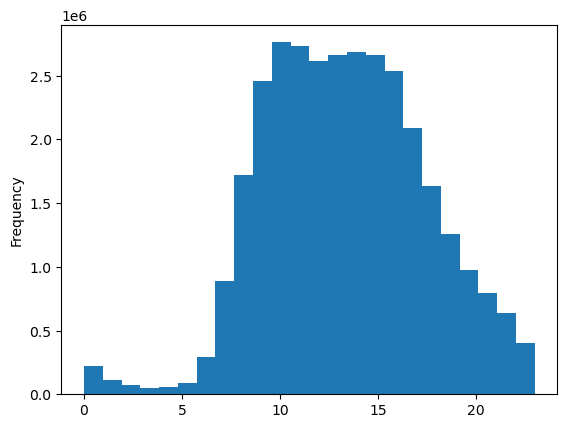

In [39]:
# creating a histogram of order_hour_of_day
hist_1 = custs_ords_prods['order_hour_of_day'].plot.hist(bins = 24)

In [40]:
# exporting the histogram
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

### observation
#### the histogram demonstrates that the busiest hours of the day are from 8 am to 4pm 

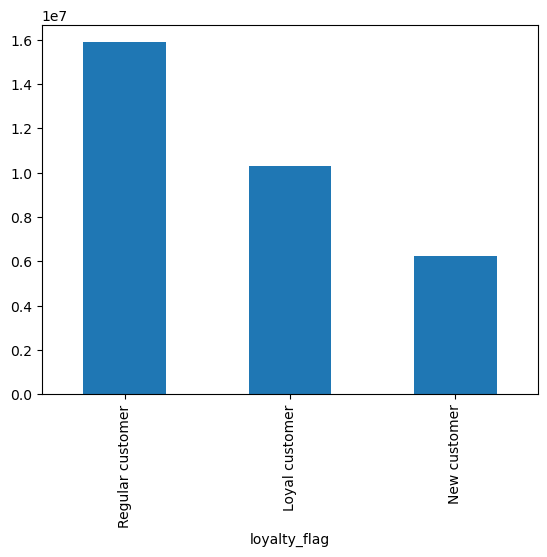

In [42]:
# creating a bar chart for loyality_flag
bar_1 = custs_ords_prods['loyalty_flag'].value_counts().plot.bar()

### Checking whether there’s a difference in expenditure

In [44]:
small.columns

Index(['order_id', 'user_id', 'prices', 'orders_day_of_week',
       'order_hour_of_day', 'busiest_day', 'loyalty_flag', 'spender_flag',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'number_of_dependants', 'family_status',
       'income'],
      dtype='object')

In [45]:
df_3 = small[['order_hour_of_day','prices']]

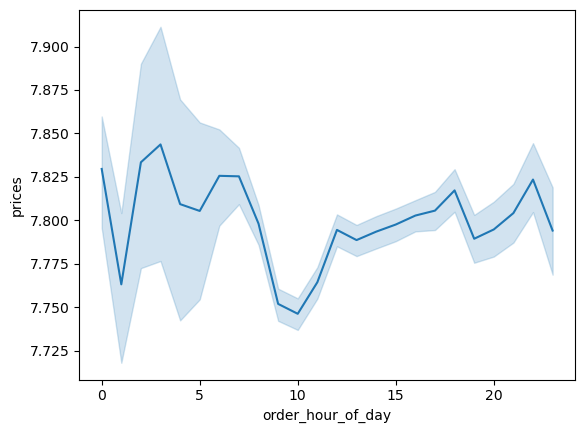

In [46]:
# creating a line chart 
line_1 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

#### The line plot suggests variations in prices across different hours of the day.
#### There's a noticeable dip and rise, with fluctuations and confidence intervals indicating variability at different hours.

In [47]:
# exporting the line chart
line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hod.png'))

### Connections between age and number of depentants

In [48]:
df_4 = small[['age','number_of_dependants']]

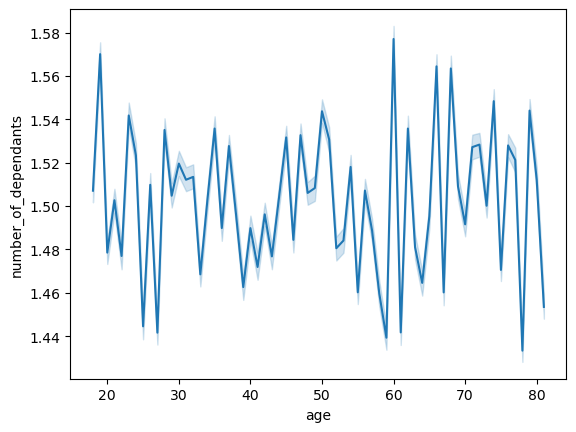

In [49]:
#creating a line chart
line_age_nod = sns.lineplot(data = df_4, x = 'age', y = 'number_of_dependants')

#### there is no noticeable correlation betweent the 2 variables

In [53]:
# exporting the line chart
line_age_nod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_nod.png'))

### checking whether there’s a connection between age and spending power (income)

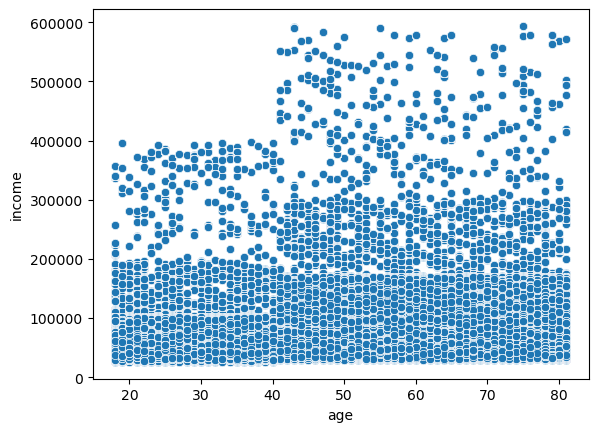

In [52]:
#creating a scatterplot of 'Age' and 'Income'
scatter = sns.scatterplot( x = 'age', y = 'income', data = small)

In [54]:
# exporting the line chart
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

#### There appears to be a concentration of data points around lower income levels, particularly below 200,000.
#### As age increases, the variability in income widens, with some individuals earning much higher incomes in the 40–60 age range.